In [3]:
!pip install researchpy > /dev/null&

# 1. 일원 분산분석
import pandas as pd
import researchpy as rp

cotton = pd.read_csv('cotton.csv')
cotton.head(3)

,pct,tensile
0,15,7
1,15,7
2,15,15


In [4]:
rp.summary_cont(cotton['tensile'].groupby(cotton['pct']))

,N,Mean,SD,SE,95% Conf.,Interval
pct,,,,,,
15,5,9.8,3.3466,1.4967,5.6446,13.9554
20,5,15.4,3.1305,1.4000,11.5130,19.2870
25,5,17.6,2.0736,0.9274,15.0252,20.1748
30,5,21.6,2.6077,1.1662,18.3621,24.8379
35,5,10.8,2.8636,1.2806,7.2444,14.3556


In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

fit = ols('cotton.tensile ~ C(cotton.pct)', data=cotton).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cotton.tensile   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     14.76
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           9.13e-06
Time:                        12:19:02   Log-Likelihood:                -58.771
No. Observations:                  25   AIC:                             127.5
Df Residuals:                      20   BIC:                             133.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.8000      1.270      7.719      0.000       7.152      12.448
C(cotton.pct)[T.20]     5.6000      1.796      3.119      0.005       1.855       9.345
C(cotton.pct)[T.25]     7.8000      1.796      4.344      0.000       4.055      11.545
C(cotton.pct)[T.30]    11.8000      1.796      6.572      0.000       8.055      15.545
C(cotton.pct)[T.35]     1.0000      1.796      0.557      0.584      -2.745       4.745
==============================================================================
Omnibus:                        1.435   Durbin-Watson:                   2.402
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                0.957
Skew:                           0.106   Prob(JB):                        0.620
Kurtosis:                       2.065   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
aov_fit = sm.stats.anova_lm(fit, type=2)
aov_fit

,df,sum_sq,mean_sq,F,PR(>F)
C(cotton.pct),4.0,475.76,118.94,14.756824,0.000009
Residual,20.0,161.20,8.06,NaN,NaN


In [9]:
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(cotton['tensile'], cotton['pct'])
mc_tukey = mc.tukeyhsd()
print(mc_tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    15     20      5.6 0.0385   0.227 10.973   True
    15     25      7.8 0.0026   2.427 13.173   True
    15     30     11.8    0.0   6.427 17.173   True
    15     35      1.0 0.9798  -4.373  6.373  False
    20     25      2.2 0.7372  -3.173  7.573  False
    20     30      6.2 0.0189   0.827 11.573   True
    20     35     -4.6 0.1163  -9.973  0.773  False
    25     30      4.0 0.2101  -1.373  9.373  False
    25     35     -6.8 0.0091 -12.173 -1.427   True
    30     35    -10.8 0.0001 -16.173 -5.427   True
---------------------------------------------------


In [12]:
# 2. 이원 분산분석
glass = pd.read_csv('glass.csv')
glass.head(2)

,glass,temperature,strength
0,1,100,580
1,1,100,568


In [13]:
rp.summary_cont(glass['strength'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,strength,27.0,940.1852,304.9798,58.6934,819.5392,1060.8312


In [17]:
rp.summary_cont(glass.groupby(['glass']))['strength']

,N,Mean,SD,SE,95% Conf.,Interval
glass,,,,,,
1,9,1015.3333,356.3289,118.7763,741.4347,1289.2319
2,9,967.0000,333.7840,111.2613,710.4309,1223.5691
3,9,838.2222,212.2527,70.7509,675.0704,1001.3741


In [18]:
rp.summary_cont(glass.groupby(['temperature']))['strength']

,N,Mean,SD,SE,95% Conf.,Interval
temperature,,,,,,
100,9,566.3333,20.9344,6.9781,550.2417,582.4250
125,9,1059.0000,29.3258,9.7753,1036.4582,1081.5418
150,9,1195.2222,233.8829,77.9610,1015.4439,1375.0005


In [19]:
rp.summary_cont(glass.groupby(['glass', 'temperature']))['strength']

N       Mean       SD       SE  95% Conf.   Interval
glass temperature                                                      
1     100          3   572.6667   6.4291   3.7118   556.6959   588.6374
      125          3  1087.3333   2.5166   1.4530  1081.0817  1093.5849
      150          3  1386.0000   6.0000   3.4641  1371.0952  1400.9048
2     100          3   553.0000  24.6374  14.2244   491.7974   614.2026
      125          3  1035.0000  35.0000  20.2073   948.0552  1121.9448
      150          3  1313.0000  14.5258   8.3865  1276.9158  1349.0842
3     100          3   573.3333  26.5393  15.3225   507.4061   639.2606
      125          3  1054.6667  10.5987   6.1192  1028.3379  1080.9954
      150          3   886.6667  18.6100  10.7445   840.4368   932.8966

In [20]:
model = ols('strength~C(glass)*C(temperature)', data=glass).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     824.8
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.78e-21
Time:                        13:03:08   Log-Likelihood:                -112.51
No. Observations:                  27   AIC:                             243.0
Df Residuals:                      18   BIC:                             254.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             572.6667     11.038     51.881      0.000     549.476     595.857
C(glass)[T.2]                         -19.6667     15.610     -1.260      0.224     -52.463      13.129
C(glass)[T.3]                           0.6667     15.610      0.043      0.966     -32.129      33.463
C(temperature)[T.125]                 514.6667     15.610     32.970      0.000     481.871     547.463
C(temperature)[T.150]                 813.3333     15.610     52.103      0.000     780.537     846.129
C(glass)[T.2]:C(temperature)[T.125]   -32.6667     22.076     -1.480      0.156     -79.047      13.714
C(glass)[T.3]:C(temperature)[T.125]   -33.3333     22.076     -1.510      0.148     -79.714      13.047
C(glass)[T.2]:C(temperature)[T.150]   -53.3333     22.076     -2.416      0.027     -99.714      -6.953
C(glass)[T.3]:C(temperature)[T.150]  -500.0000     22.076    -22.649      0.000    -546.380    -453.620
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.035
Skew:                           0.009   Prob(JB):                        0.983
Kurtosis:                       3.175   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model_anova = sm.stats.anova_lm(model, typ=2)
model_anova

,sum_sq,df,F,PR(>F)
C(glass),1.508645e+05,2.0,206.370554,3.886026e-13
C(temperature),1.970335e+06,2.0,2695.259499,5.008957e-23
C(glass):C(temperature),2.905517e+05,4.0,198.725707,1.254188e-14
Residual,6.579333e+03,18.0,NaN,NaN


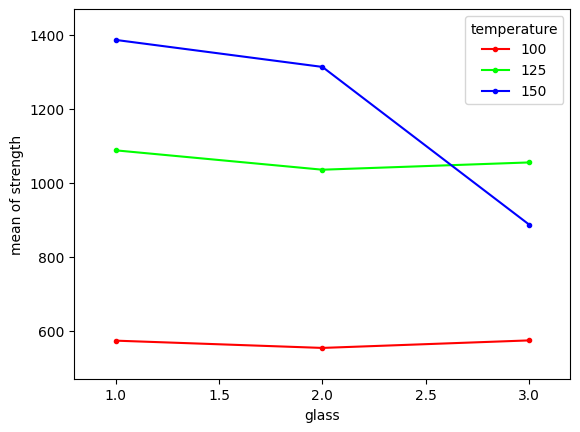

In [22]:
# 교호 작용
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(glass['glass'], glass['temperature'], glass['strength'])